#### Multi Layer Perceptron

Predict sepal_length from the rest of the features.

Load IRIS Dataset from Scikitlearn Dataset

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [2]:
#importing dataset
iris = datasets.load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### Dataset - Features and Target Labels

In [5]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
X.shape

(150, 4)

In [7]:
x = X[:,[1,2,3]]
y = X[:,[0]]

In [8]:
x.shape

(150, 3)

In [9]:
y.shape

(150, 1)

#### Split Data into Training and Test Set

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=101)

In [12]:
print('\n Shape of Training data : ', X_train.shape)
print('\n Shape of Test data : ', X_test.shape)


 Shape of Training data :  (105, 3)

 Shape of Test data :  (45, 3)


### Standardize the dataset

In [106]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### Build the Multilayer Perceptron Model

In [107]:
from keras.models import Sequential, Model
from keras.layers import Dense

In [108]:
##MODEL

#Build a simple MLP model
model = Sequential()
model.add(Dense(10, input_dim=3, activation='sigmoid')) # first hidden layer with 5 neurons
model.add(Dense(6, activation = 'sigmoid'))  #second hidden layer with 3 neurons
model.add(Dense(1, activation = 'linear'))

#compile model
model.compile(optimizer = 'adam', loss = 'mse', metrics = 'mse')

In [109]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                40        
                                                                 
 dense_20 (Dense)            (None, 6)                 66        
                                                                 
 dense_21 (Dense)            (None, 1)                 7         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [110]:
from keras.utils import plot_model

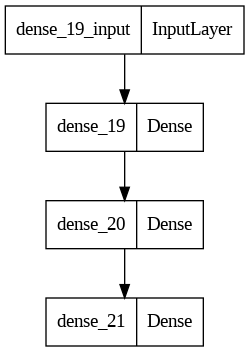

In [111]:
plot_model(model)

Initial Weights and Biases

Keras oficial documentation says....

kernel_initializer="glorot_uniform"

bias_initializer="zeros"

In [112]:
weights = model.get_weights()

In [113]:
weights
#weights[0]

[array([[ 0.3472247 ,  0.03389537,  0.06543422, -0.06072128, -0.6709971 ,
         -0.1398086 ,  0.5287396 , -0.1140877 ,  0.0436337 , -0.19927701],
        [ 0.48344445,  0.65921867, -0.57186425,  0.40150893, -0.46865973,
          0.1910823 ,  0.0993638 , -0.21340969,  0.17739034, -0.2695476 ],
        [-0.19392669, -0.33651993, -0.6096708 , -0.20897242, -0.21192065,
         -0.21307084, -0.6634334 , -0.35580352, -0.4614425 ,  0.11028731]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.55538625,  0.11104923,  0.5070401 , -0.25031516, -0.32444337,
         -0.05920136],
        [-0.58885944,  0.12498313,  0.14795929,  0.26783907, -0.31445763,
          0.15106094],
        [-0.37330827, -0.3778419 ,  0.35837936,  0.30449438, -0.31196246,
         -0.5023175 ],
        [-0.49514872,  0.60086626, -0.16818786, -0.31656355, -0.0888204 ,
          0.16818142],
        [-0.27403054, -0.37683827,  0.6046657 , -0.4520114 , -0.08501649,
  

In [114]:
y.dtype

dtype('float64')

Train the Model

In [115]:
X_train_std.shape

(105, 3)

In [125]:
history = model.fit(X_train_std, y_train, epochs = 100, batch_size = 4, validation_data = (X_test_std, y_test))

Epoch 1/100
27/27 [==============================] - 0s 6ms/step - loss: 1.3400 - mse: 1.3400 - val_loss: 1.2194 - val_mse: 1.2194
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 1.2771 - mse: 1.2771 - val_loss: 1.1572 - val_mse: 1.1572
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 1.2177 - mse: 1.2177 - val_loss: 1.1027 - val_mse: 1.1027
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 1.1659 - mse: 1.1659 - val_loss: 1.0508 - val_mse: 1.0508
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 1.1153 - mse: 1.1153 - val_loss: 1.0055 - val_mse: 1.0055
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 1.0711 - mse: 1.0711 - val_loss: 0.9636 - val_mse: 0.9636
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 1.0306 - mse: 1.0306 - val_loss: 0.9247 - val_mse: 0.9247
Epoch 8/100
27/27 [==============================] - 0s 2ms/step - loss: 0.9936 - m

Post Training-what are the weights and biases

In [126]:
weights = model.get_weights()

In [127]:
weights[0]

array([[ 0.81012815,  0.5117789 ,  0.28876898,  0.61638623, -0.3097839 ,
         0.40294018,  0.8037389 ,  0.14075182,  0.48594072,  0.31124616],
       [ 1.3966448 ,  1.5100468 ,  0.47458097,  1.537999  ,  0.55396944,
         1.360727  ,  1.3951324 ,  0.5960019 ,  1.0802335 ,  0.6417471 ],
       [ 0.6920136 ,  0.4798661 ,  0.4188881 ,  0.8789385 ,  0.785461  ,
         0.93452567,  0.57834846,  0.44721097,  0.4186518 ,  0.9895074 ]],
      dtype=float32)

Plot Loss/Accuracy Curve for Training and Validation Data

In [128]:
from keras.utils import plot_model
import matplotlib.pyplot as plt

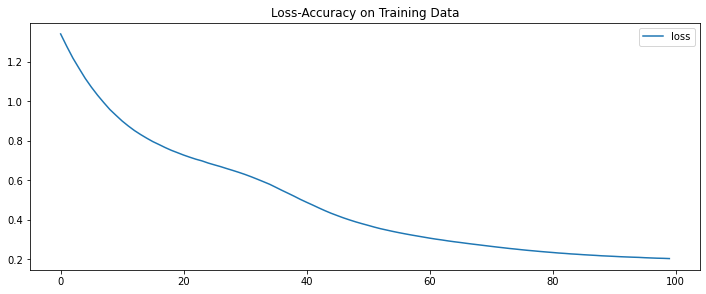

In [129]:
# Plot Loss Profile of the model on Training Data
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.title('Loss-Accuracy on Training Data')
plt.plot(history.history['loss'], label='loss')
plt.legend()

Test/Make Predictions

In [130]:
pred = model.predict(X_test_std)
print(np.round(pred.ravel(),2))
print()
print(y_test)

2/2 [==============================] - 0s 5ms/step
[5.63 5.42 5.32 6.41 6.36 6.33 5.97 5.77 6.31 4.65 6.41 5.53 5.07 6.43
 6.38 6.21 6.21 6.19 4.74 6.33 5.67 5.21 6.07 6.31 6.21 6.04 5.33 6.4
 4.72 4.4  6.43 5.92 6.41 5.97 6.42 6.21 6.35 6.27 6.1  6.44 5.33 4.9
 4.85 6.38 6.31]

[[5.5]
 [5.4]
 [5. ]
 [7.2]
 [7. ]
 [6.3]
 [6.2]
 [5.5]
 [6.3]
 [4.9]
 [6.5]
 [5.2]
 [5.4]
 [7.7]
 [6.1]
 [6.4]
 [5.6]
 [5.7]
 [4.4]
 [6.1]
 [5.5]
 [5.3]
 [5.5]
 [6.7]
 [6.2]
 [5.6]
 [5. ]
 [5.8]
 [5. ]
 [4.5]
 [6.5]
 [5.5]
 [6.5]
 [5.8]
 [6.8]
 [5.7]
 [6.7]
 [5.9]
 [5.6]
 [7.7]
 [5.1]
 [4.6]
 [4.7]
 [6.7]
 [5.6]]


Regression Metrics

In [131]:
from sklearn.metrics import mean_squared_error, r2_score

In [132]:
mse = mean_squared_error(y_test, pred) 
print(" MSE = ", mse)

 MSE =  0.19651503246596128


In [133]:
r2 = r2_score(y_test, pred) 
print(" R2 = ", r2)

 R2 =  0.6829240974442476


Evaluate the Model on the Test Set

In [134]:
results = model.evaluate(X_test_std, y_test)

print('Final test set Loss: {:4f}'.format(results[0]))
print('Final test set MSE: {:4f}'.format(results[1]))

2/2 [==============================] - 0s 6ms/step - loss: 0.1965 - mse: 0.1965
Final test set Loss: 0.196515
Final test set MSE: 0.196515


Verify the Output with an individual Sample

In [135]:
idx = 11 # Index of a data sample present in the Test set

indvidual_test_sample = X_test_std[idx,:].reshape(1, 3)

print('\n Input sample Original : ' , X_test[idx,:].reshape(1, 3) )
print('\n Input sample Standardize : ' , indvidual_test_sample )


 Input sample Original :  [[4.1 1.5 0.1]]

 Input sample Standardize :  [[ 2.38816637 -1.24399423 -1.3813581 ]]


In [136]:
pred = model.predict(indvidual_test_sample)

print('\n Predicted value by the model : ', pred)

print('\n True/Actual Value : ', y_test[idx])

1/1 [==============================] - 0s 19ms/step

 Predicted value by the model :  [[5.52671]]

 True/Actual Value :  [5.2]
